
# The relationship between consumer spending and government approval

## Permissions
[ ] YES - make available <br>
[ ] NO - keep private

## Overview
Our project aims to examine the relationship between consumer non-essential spending and government spending with perceived approval of the sitting president.

## Group Members
Martyna Marcinkowska, <br>
Alyssa Goebel, <br>
Sachiko Brown, <br>
Janhavi Chafekar, <br>
Haley Rezendes
## PIDs
A16140394, <br>
A13296387, <br>
A15631683, <br>
A15109120, <br>
A14597775

## Research Question

How does presidential approval rating correlate with consumer and government expenditure? Specifically, how does presidential approval rating correlate with sales of cars, sales of clothes, restaurant sales, and government social benefits to persons?

## Background & Prior Work ##

After revising our original idea, our team ultimately decided on a political/economic route for this project. We were interested to see whether there is a correlation between presidential approval ratings and consumer spending. <br> In general, presidential approval ratings can be affected by a variety of factors including current events, political orientation, and overall job performance. With this said, there seems to be a slight indication of decline in presidential approval ratings since 1990 (Gallup, 2019). Interestingly, the Economist reports that, in the past 12 years, consumer confidence has predicted presidential popularity, but that trend seems to be changing in the era of Trump. <br> Our team remotely collaborated to decide which categories of spending data would create a well-rounded picture of non-essential spending by consumers. We concluded that purchases of cars, clothing, and restaurant food/drinks would be most indiciative of the major trends in personal spending. In addition, we were inspired by current events in the time of COVID-19 to also include government social benefits to persons which includes items like stimulus checks and see whether those might be correlated with overall approval as well.


**References**

1. https://news.gallup.com/interactives/185273/presidential-job-approval-center.aspx

2. https://www.economist.com/united-states/2020/01/11/consumer-confidence-no-longer-translates-into-presidential-popularity

## Hypothesis ##

We hypothesize that more spending (or in particular, consumers having more money to spend and things to spend money on) would be correlated with higher perceived job approval of the president.<br> When people have money in their pocket to spend on non-essentials like going out, cars or clothing, it suggests they don't live paycheck-to-paycheck, worry about essentials, they feel less stressed, and happier overall. Thus, they feel like things are generally going well in their life, and their country. This could co-occur with them being more satisfied, or approving, of the country's leader: in the US case, the president. During time of crisis, it's also important to people whether they're receiving the help they need so the more social benefits that the government is handing out, the more people might feel like the crisis is handled well and will thus approve of the president. <br> If this hypothesis is true, with unemployment rising steadily because of the COVID-19 crisis, people have less money to spend on non-essentials so we can guess that President Trump's approval is falling. However, it might be that the fall has been mitigated due to the stimulus checks that have been distributed.

## Data ##

Our presidential approval data comes from the American Presidency Project from University of California Santa Barbara. This project is non-profit and non-partisan, so it is likely the most objective source we can find. Their website says that they consider themselves, "the source of presidential documents on the internet" and boasts over 130,000 documents. Our spending data originates with the Federal Reserve Bank of St. Louis which tracks tons of economical data for the United States including interest rates, unemployment, GDP and more. [Details about first datasets here] 

## Datasets

#### American Presidency Project - Approval Ratings

https://docs.google.com/spreadsheets/d/1iEl565M1mICTubTtoxXMdxzaHzAcPTnb3kpRndsrfyY/edit?usp=sharing

3,574 observations (for the 5 presidents we used)

The dataset we pulled lists survey results taken roughly biweekly for more recent presidents who we're investigating. We cleaned this data to compile and average ratings by month to standardize across the number of observations for each president we are examining. In out final dataset, we included Donald Trump, Barack Obama, George W. Bush, Bill Clinton, and George H.W. Bush, so our data set tracks monthly presidential approval data from April 2020 back to January 1989.


#### Retail Sales: Restaurants and Other Eating Places

https://fred.stlouisfed.org/series/MRTSSM7225USN

339 observations

Not seasonally-adjusted, monthly retail sales data of restaurants and other eating places in the US in millions of dollars since January 1992 till March 2020, collected by the United States Census Bureau.

#### Retail Sales: Clothing Stores

https://fred.stlouisfed.org/series/MRTSSM4481USS

339 observations

Seasonally-adjusted, monthly retail sales data of clothing stores in the US in millions of dollars since January 1992 till March 2020, collected by the United States Census Bureau.

#### Retail Sales: Auto and Other Motor Vehicles

https://fred.stlouisfed.org/series/MRTSSM441XUSS

339 observations 

Seasonally-adjusted, monthly retail sales data of autos and other motor vehicles in the US in millions of dollars since January 1992 till March 2020, collected by the United States Census Bureau.


#### Federal government current transfer payments: Government social benefits: to persons

https://fred.stlouisfed.org/series/B087RC1Q027SBEA

293 observations

[1-2 sentences describing each dataset.]


#### Monthly Inflation

https://inflationdata.com/Inflation/Inflation_Rate/Monthly_Inflation.aspx

340 observations (for the timespan we used)

Monthly US inflation rates (changes in prices since last month) since January 1992 to April 2020 based on the historical CPI-U data from the Bureau of Labor Statistics.

## Setup

In [69]:
from PIL import Image
#img = Image.open('Screen Shot 2020-05-28 at 1.38.09 PM.png')
#img

## Data Cleaning

The Presidential Approval data cleaning consisted of downloading each president's Google Sheet as a .CSV file, uploading to a Jupyter Notebook, converting dates to a date-time format, resampling observations into average monthly measures from the original ~2 week intervals, and labeling the entries with the name of the president being evaluated. This had to be reiterated for the past 5 presidents' sheets (Trump, Obama, W. Bush, Clinton, H.W. Bush), and then each president's dataframe was concatenated into a single dataframe via Pandas. The result is a tidy, rectangular dataframe that holds monthly approval ratings for the sitting president from April 2020 back to January 1989. We later adjusted to only go back to January 1992 to fit our spending datasets. <br>

Next, we scraped the inflation data from the inflationdata.com website which was initially in a table arranged by years as the rows and months as the columns. We converted it into a pandas dataframe with the date formatted to match the retail sales data (year-month-day) so we can easily merge both. It was also adjusted over time so we can relate a 1992 dollar to current dollar's value and so adjust the retail sales value by this percentage (e.g. 1 dollar in 1992 is equal to around 0.5 dollars in 2020) <br>

Next, we cleaned the three retail sales datasets. For this, we uploaded the corresponding .CSV  files to a Jupyter Notebook, renamed the columns, and used the monthly inflation dataset to manually adjust the values for inflation. <br>

Finally, we cleaned the Government Social Benefits to Persons data. 

## Data Analysis & Results

In [70]:
# Import seaborn and apply its plotting styles
import seaborn as sns
sns.set(style="white", font_scale=2)

# import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
# set plotting size parameter
plt.rcParams['figure.figsize'] = (17, 7)

# import pandas and numpy
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

#improve resolution
%config InlineBackend.figure_format ='retina'

# Statmodels & patsy
import patsy
import statsmodels.api as sm

from scipy.stats import skewtest 

### Approval Data

We're importing the cleaned approval dataframe and converting the date to only year-month format as the day is irrelevant (all observations are averages of many surveys that happened that month).

In [71]:
approval_df = pd.read_csv('ApprovalDataTo1989.csv')
approval_df['date_month_only'] = approval_df['End Date'].str[:7]
approval_df.head()

,End Date,Approving,Disapproving,Unsure/NoData,President,date_month_only
0,2020-04-30,46.0,50.5,5.5,Trump,2020-04
1,2020-03-31,46.5,48.5,5.0,Trump,2020-03
2,2020-02-29,48.0,49.5,2.5,Trump,2020-02
3,2020-01-31,46.5,51.5,2.0,Trump,2020-01
4,2019-12-31,45.0,51.0,4.0,Trump,2019-12


Firstly, we want to see the overall pattern in approval rating over time:

Text(0.5, 1.0, 'Approval of the presidents of the US (1989-2020)')

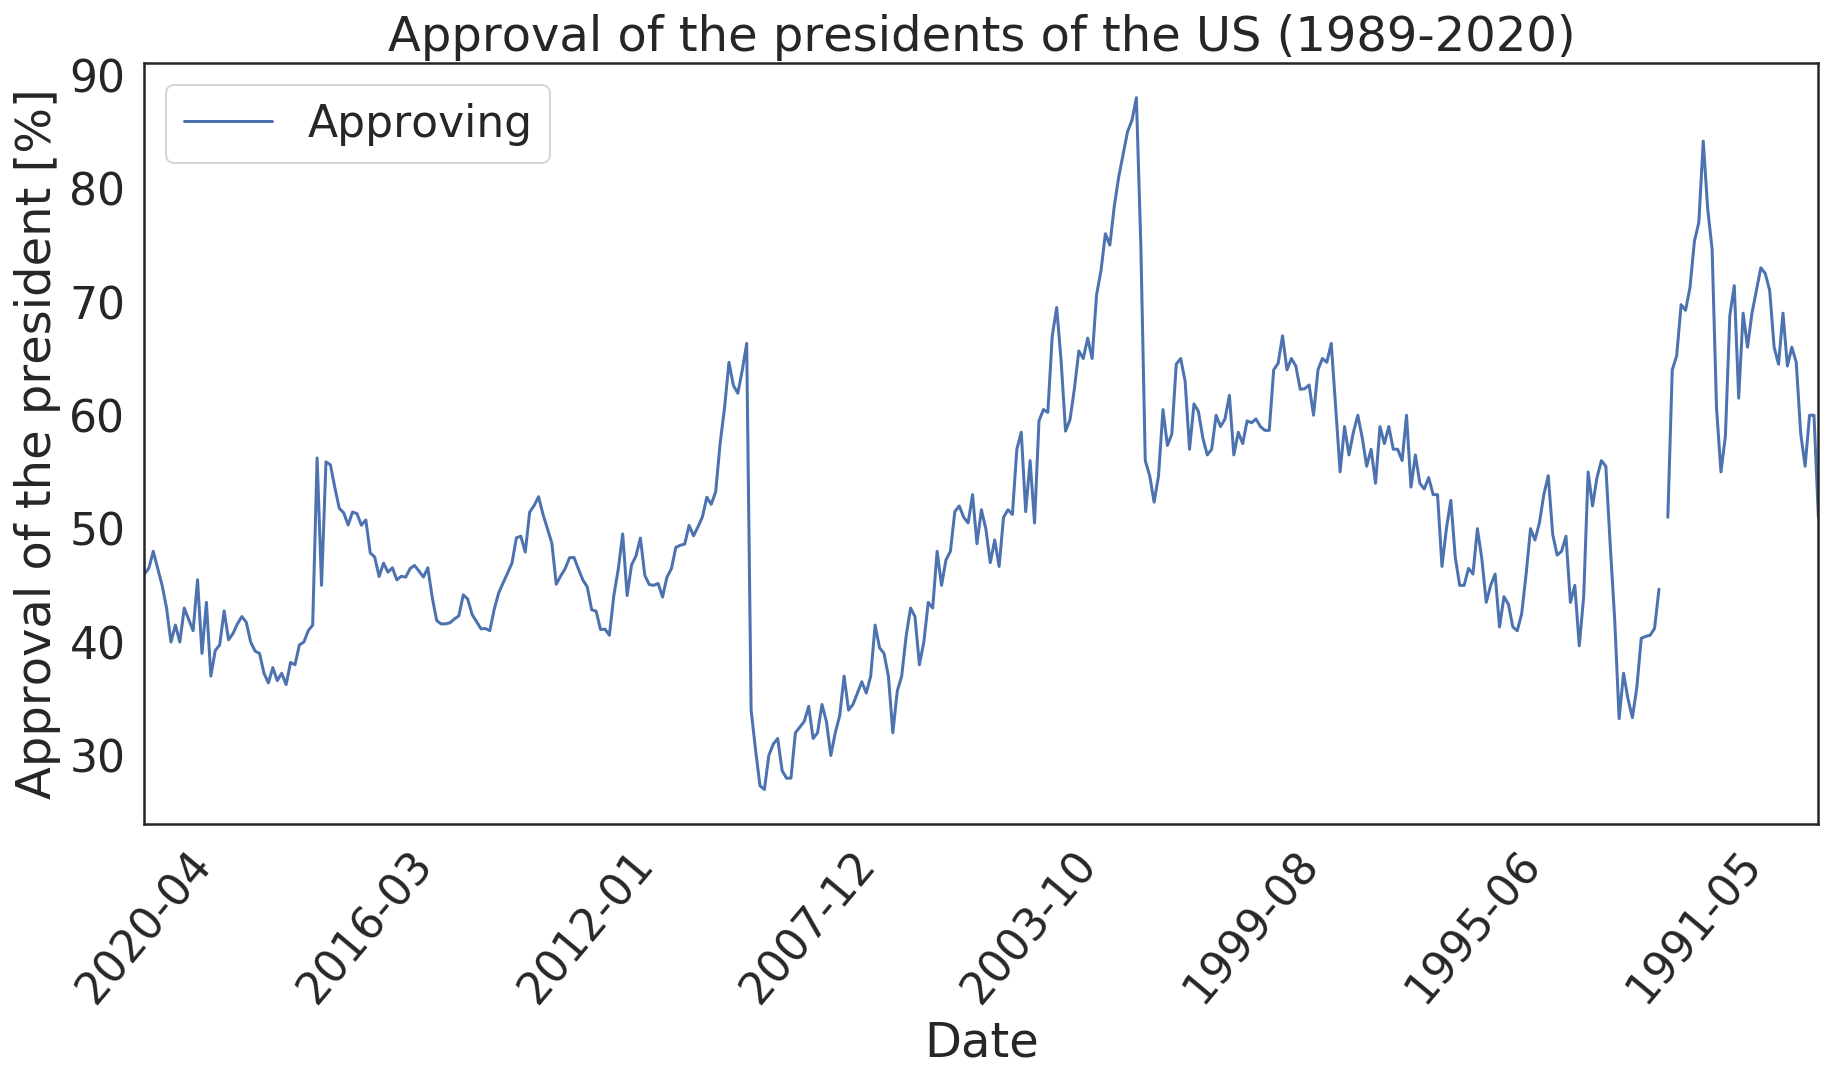

In [72]:
fig = approval_df.plot.line(x='date_month_only',y='Approving',rot=50,figsize=(15,7))
fig.set_xlabel('Date')
fig.set_ylabel('Approval of the president [%]')
fig.set_title('Approval of the presidents of the US (1989-2020)')

### Retail Sales: Autos and Other Motor Vehicles

We're importing the cleaned and adjusted for inflation vehicles sales dataframe.

In [73]:
vehicles_sales = pd.read_csv('vehicles_sales_clean.csv')
vehicles_sales.drop(columns='Unnamed: 0', inplace=True)
vehicles_sales.head()

,date,sales,inflation,inflation_adjusted,sales_adjusted
0,1992-01-01,30167,0.15,0.998500,30167.000000
1,1992-02-01,30457,0.36,0.994905,30411.314500
2,1992-03-01,29891,0.51,0.989831,29738.717311
3,1992-04-01,30361,0.14,0.988446,30052.270603
4,1992-05-01,30847,0.14,0.987062,30490.581995


Firstly, we want to see the overall pattern in retail sales of autos over time:

Text(0.5, 1.0, 'Retail sales of autos and other motor vehicles (1992-2020)')

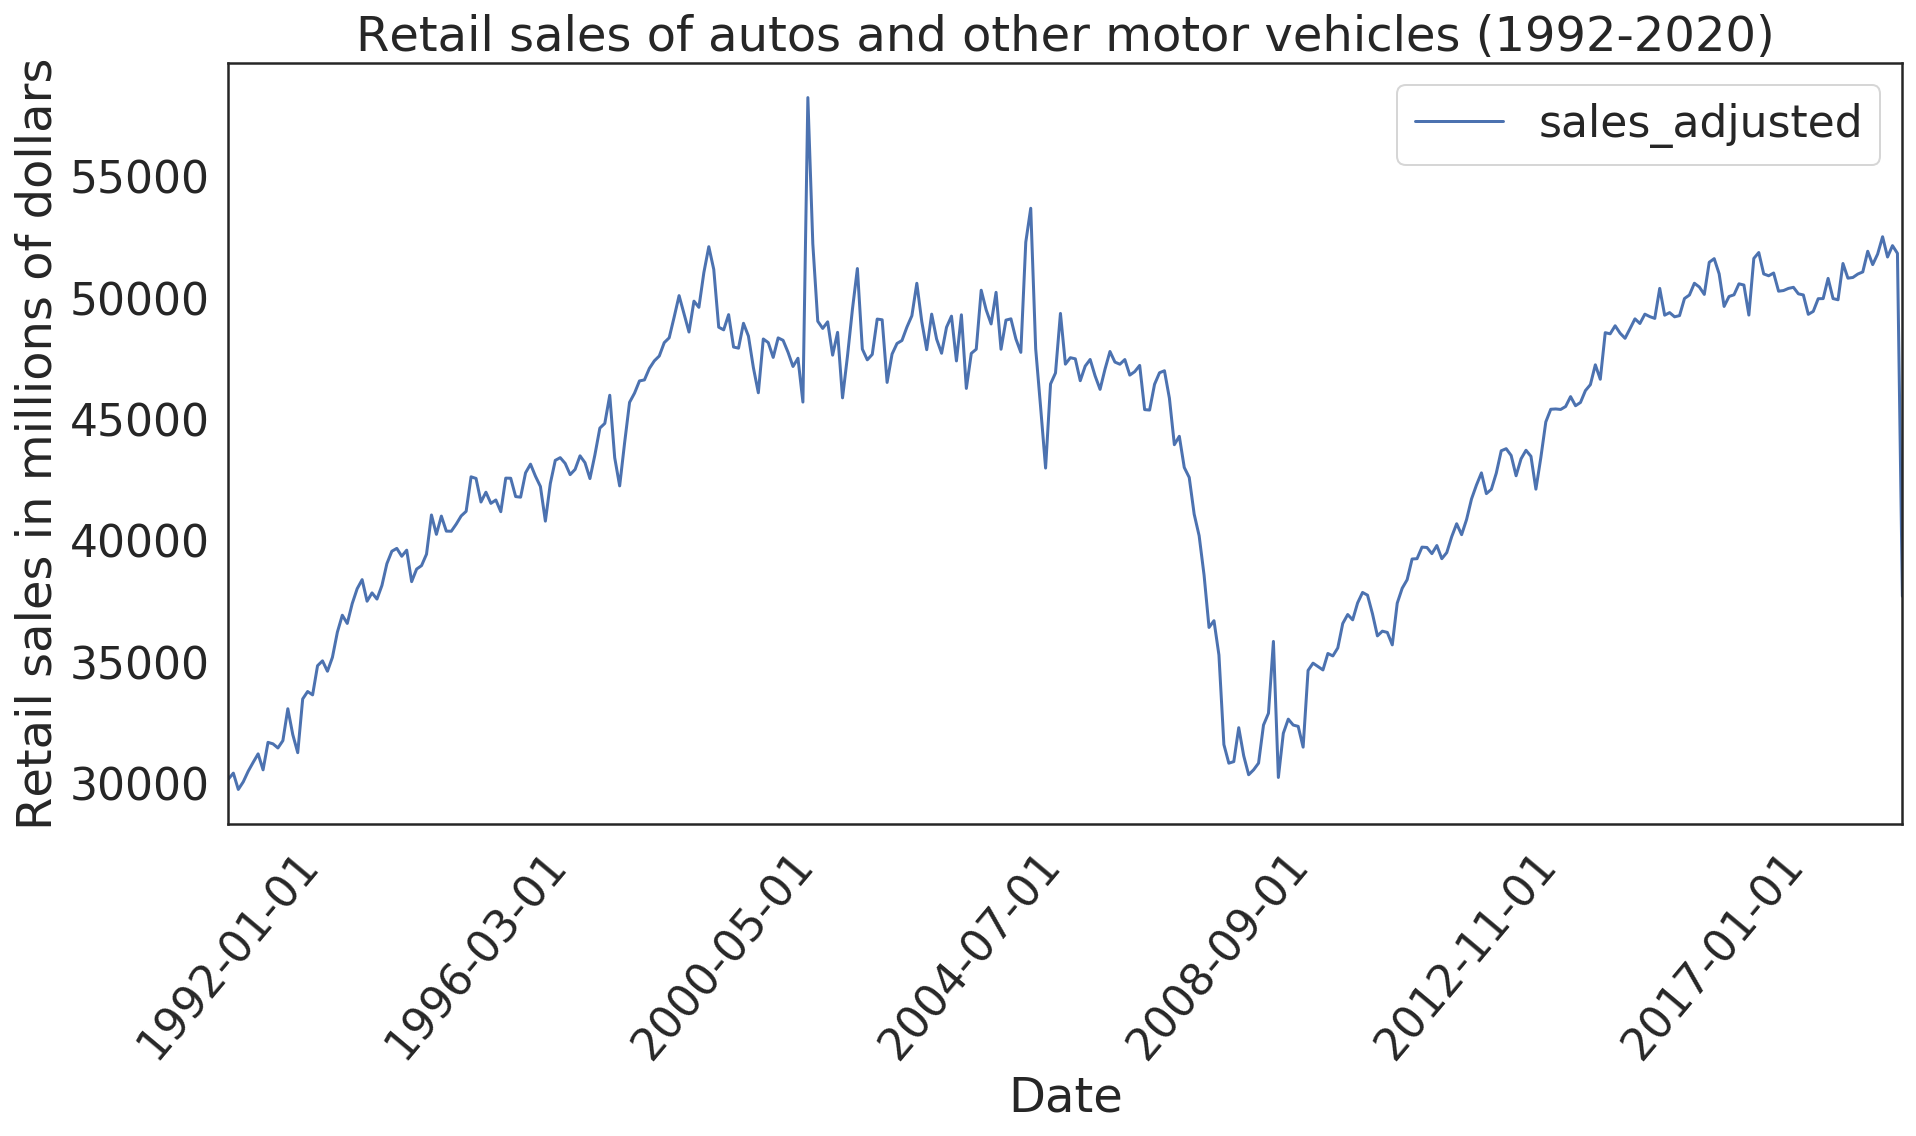

In [74]:
fig = vehicles_sales.plot.line(x='date',y='sales_adjusted',rot=50,figsize=(15,7))
fig.set_xlabel('Date')
fig.set_ylabel('Retail sales in millions of dollars')
fig.set_title('Retail sales of autos and other motor vehicles (1992-2020)')

There seems to be an overall increase in approval till around 2008, then a huge decrease and a steady increase again till 2019 where we see another fall.

In [75]:
vehicles_sales['date_month_only'] = vehicles_sales['date'].str[:7]
vehicles_approval_df = pd.merge(vehicles_sales, approval_df, how='outer')
vehicles_approval_df.dropna(inplace=True)
vehicles_approval_df.head()

,date,sales,inflation,inflation_adjusted,sales_adjusted,date_month_only,End Date,Approving,Disapproving,Unsure/NoData,President
0,1992-01-01,30167.0,0.15,0.998500,30167.000000,1992-01,1992-01-31,44.666667,48.000000,5.666667,Bush
1,1992-02-01,30457.0,0.36,0.994905,30411.314500,1992-02,1992-02-29,41.200000,48.600000,8.600000,Bush
2,1992-03-01,29891.0,0.51,0.989831,29738.717311,1992-03,1992-03-31,40.600000,49.200000,8.400000,Bush
3,1992-04-01,30361.0,0.14,0.988446,30052.270603,1992-04,1992-04-30,40.500000,50.000000,8.000000,Bush
4,1992-05-01,30847.0,0.14,0.987062,30490.581995,1992-05,1992-05-31,40.333333,50.333333,7.666667,Bush


Because of the variance each month between the unsure/no data category, we decided it'd be best if we took a percent of the total approving votes over the total of approving + disapproving votes. Similarly, to make comparisons between the ratings and the sales, we chose to look at sales this month over max total sales during that period.

In [76]:
vehicles_approval_df['approval_to_disapproval'] = ((vehicles_approval_df['Approving'] / (vehicles_approval_df['Approving'] + vehicles_approval_df['Disapproving'])) * 100)
vehicles_approval_df['sales_percent_max'] = ((vehicles_approval_df['sales_adjusted'] / vehicles_approval_df['sales_adjusted'].max()) * 100)
vehicles_approval_df.head()

,date,sales,inflation,inflation_adjusted,sales_adjusted,date_month_only,End Date,Approving,Disapproving,Unsure/NoData,President,approval_to_disapproval,sales_percent_max
0,1992-01-01,30167.0,0.15,0.998500,30167.000000,1992-01,1992-01-31,44.666667,48.000000,5.666667,Bush,48.201439,51.796861
1,1992-02-01,30457.0,0.36,0.994905,30411.314500,1992-02,1992-02-29,41.200000,48.600000,8.600000,Bush,45.879733,52.216350
2,1992-03-01,29891.0,0.51,0.989831,29738.717311,1992-03,1992-03-31,40.600000,49.200000,8.400000,Bush,45.211581,51.061498
3,1992-04-01,30361.0,0.14,0.988446,30052.270603,1992-04,1992-04-30,40.500000,50.000000,8.000000,Bush,44.751381,51.599870
4,1992-05-01,30847.0,0.14,0.987062,30490.581995,1992-05,1992-05-31,40.333333,50.333333,7.666667,Bush,44.485294,52.352453


We wanted to see how is the data distributed:

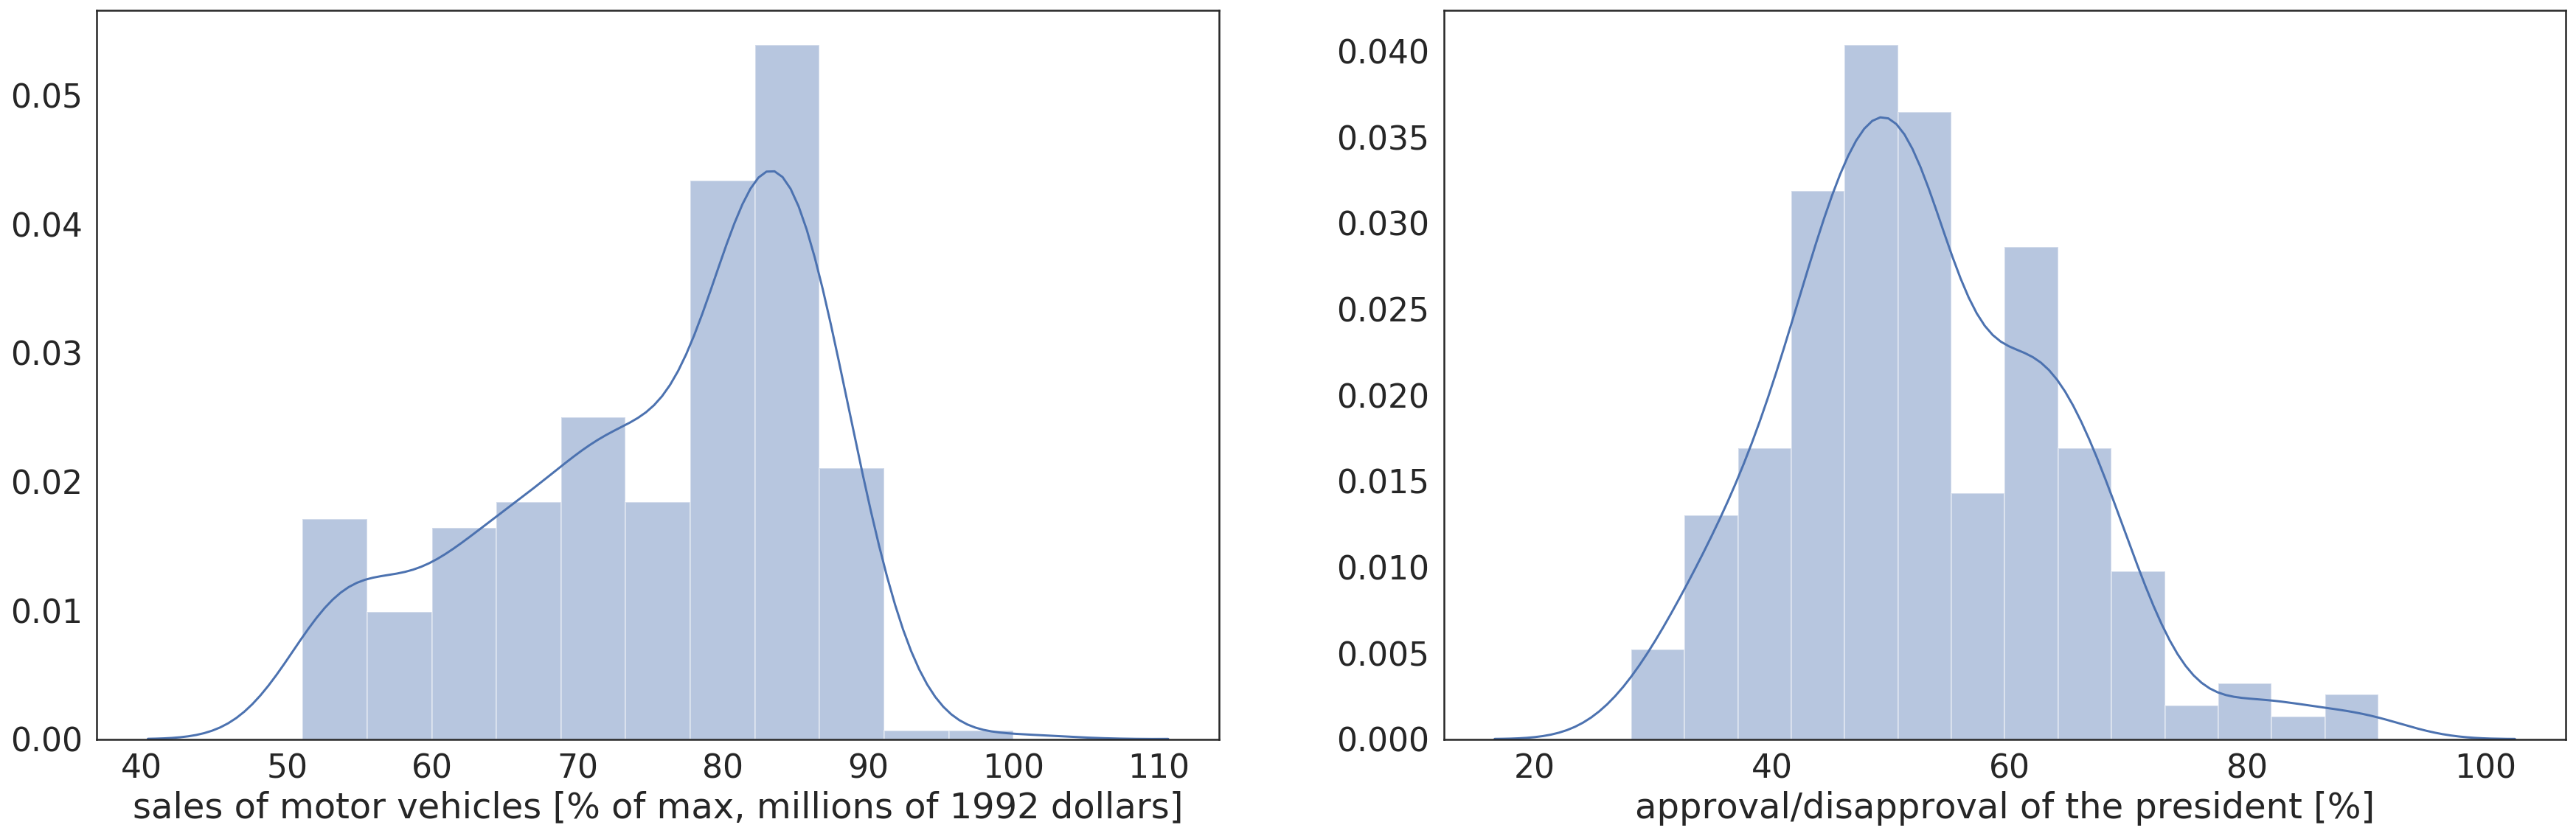

In [77]:
plt.figure(figsize=(30, 20))

plt.subplot(221)
sns.distplot(vehicles_approval_df['sales_percent_max'])
plt.xlabel('sales of motor vehicles [% of max, millions of 1992 dollars]')

plt.subplot(222)
sns.distplot(vehicles_approval_df['approval_to_disapproval'])
plt.xlabel('approval/disapproval of the president [%]');

In [78]:
print( '\nSkewness test for sales data :\n', skewtest(vehicles_approval_df['sales_percent_max'])) 
print( '\nSkewness test for approval data :\n', skewtest(vehicles_approval_df['approval_to_disapproval']))


Skewness test for sales data :
 SkewtestResult(statistic=-4.458482605273261, pvalue=8.254189395010653e-06)

Skewness test for approval data :
 SkewtestResult(statistic=3.848355193414243, pvalue=0.00011891355447592845)


Since the data is skewed, we decided to take a natural log of the data which improves the skewness of the approval significantly while not increasing the skewness of sales as much and overall improves the models discussed further. 

In [79]:
vehicles_approval_df['log_approval_to_disapproval'] = np.log(vehicles_approval_df['approval_to_disapproval'])
vehicles_approval_df['log_sales_percent_max'] = np.log(vehicles_approval_df['sales_percent_max'])
vehicles_approval_df.head()

,date,sales,inflation,inflation_adjusted,sales_adjusted,date_month_only,End Date,Approving,Disapproving,Unsure/NoData,President,approval_to_disapproval,sales_percent_max,log_approval_to_disapproval,log_sales_percent_max
0,1992-01-01,30167.0,0.15,0.998500,30167.000000,1992-01,1992-01-31,44.666667,48.000000,5.666667,Bush,48.201439,51.796861,3.875389,3.947330
1,1992-02-01,30457.0,0.36,0.994905,30411.314500,1992-02,1992-02-29,41.200000,48.600000,8.600000,Bush,45.879733,52.216350,3.826023,3.955396
2,1992-03-01,29891.0,0.51,0.989831,29738.717311,1992-03,1992-03-31,40.600000,49.200000,8.400000,Bush,45.211581,51.061498,3.811353,3.933031
3,1992-04-01,30361.0,0.14,0.988446,30052.270603,1992-04,1992-04-30,40.500000,50.000000,8.000000,Bush,44.751381,51.599870,3.801122,3.943519
4,1992-05-01,30847.0,0.14,0.987062,30490.581995,1992-05,1992-05-31,40.333333,50.333333,7.666667,Bush,44.485294,52.352453,3.795159,3.957999


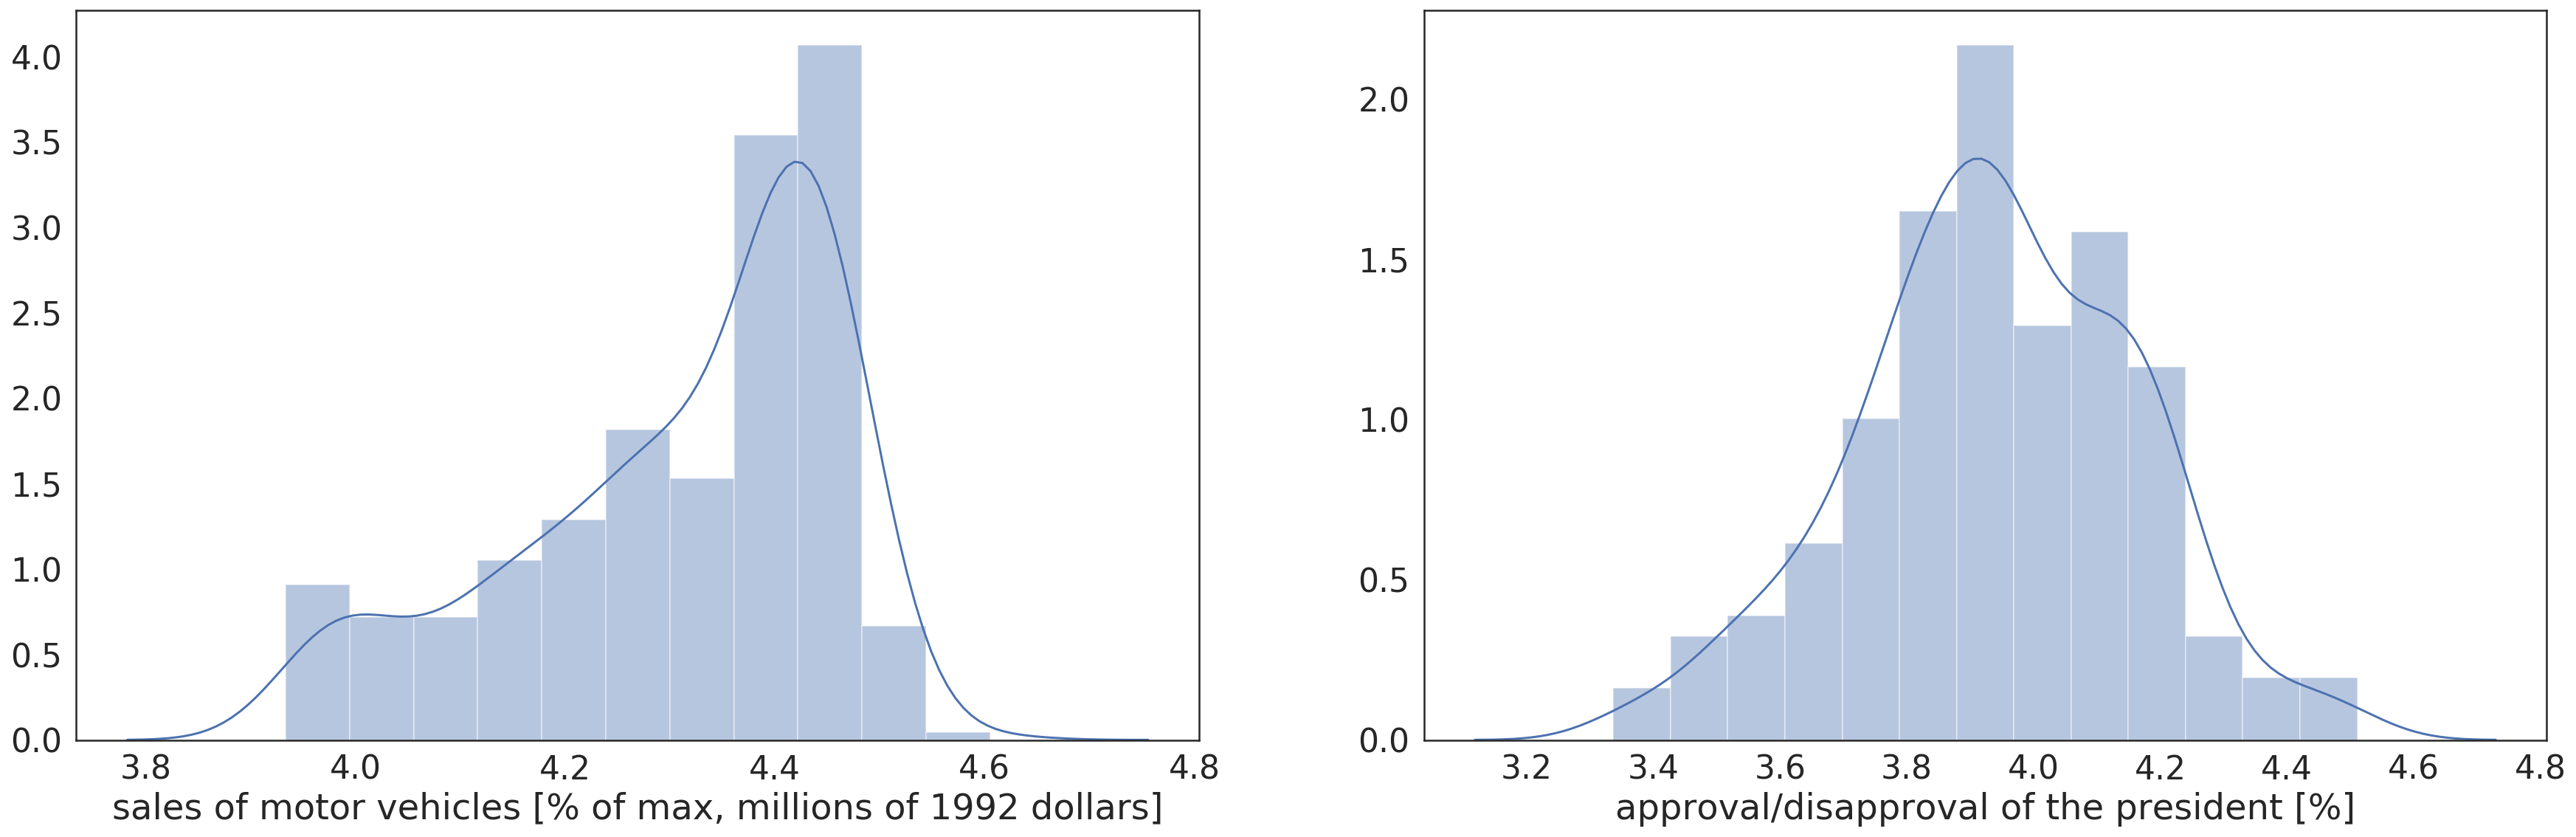

In [80]:
plt.figure(figsize=(30, 20))

plt.subplot(221)
sns.distplot(vehicles_approval_df['log_sales_percent_max'])
plt.xlabel('sales of motor vehicles [% of max, millions of 1992 dollars]')

plt.subplot(222)
sns.distplot(vehicles_approval_df['log_approval_to_disapproval'])
plt.xlabel('approval/disapproval of the president [%]');

In [81]:
print( '\nSkewness test for sales data :\n', skewtest(vehicles_approval_df['log_sales_percent_max'])) 
print( '\nSkewness test for approval data :\n', skewtest(vehicles_approval_df['log_approval_to_disapproval']))


Skewness test for sales data :
 SkewtestResult(statistic=-5.716258381539826, pvalue=1.0889512081264472e-08)

Skewness test for approval data :
 SkewtestResult(statistic=-0.9344309332016155, pvalue=0.35008164752902415)


We want to see overall whether we can see a correlation between the two.

Text(0.5, 1.0, 'Retail sales of autos and other motor vehicles (1992-2020)')

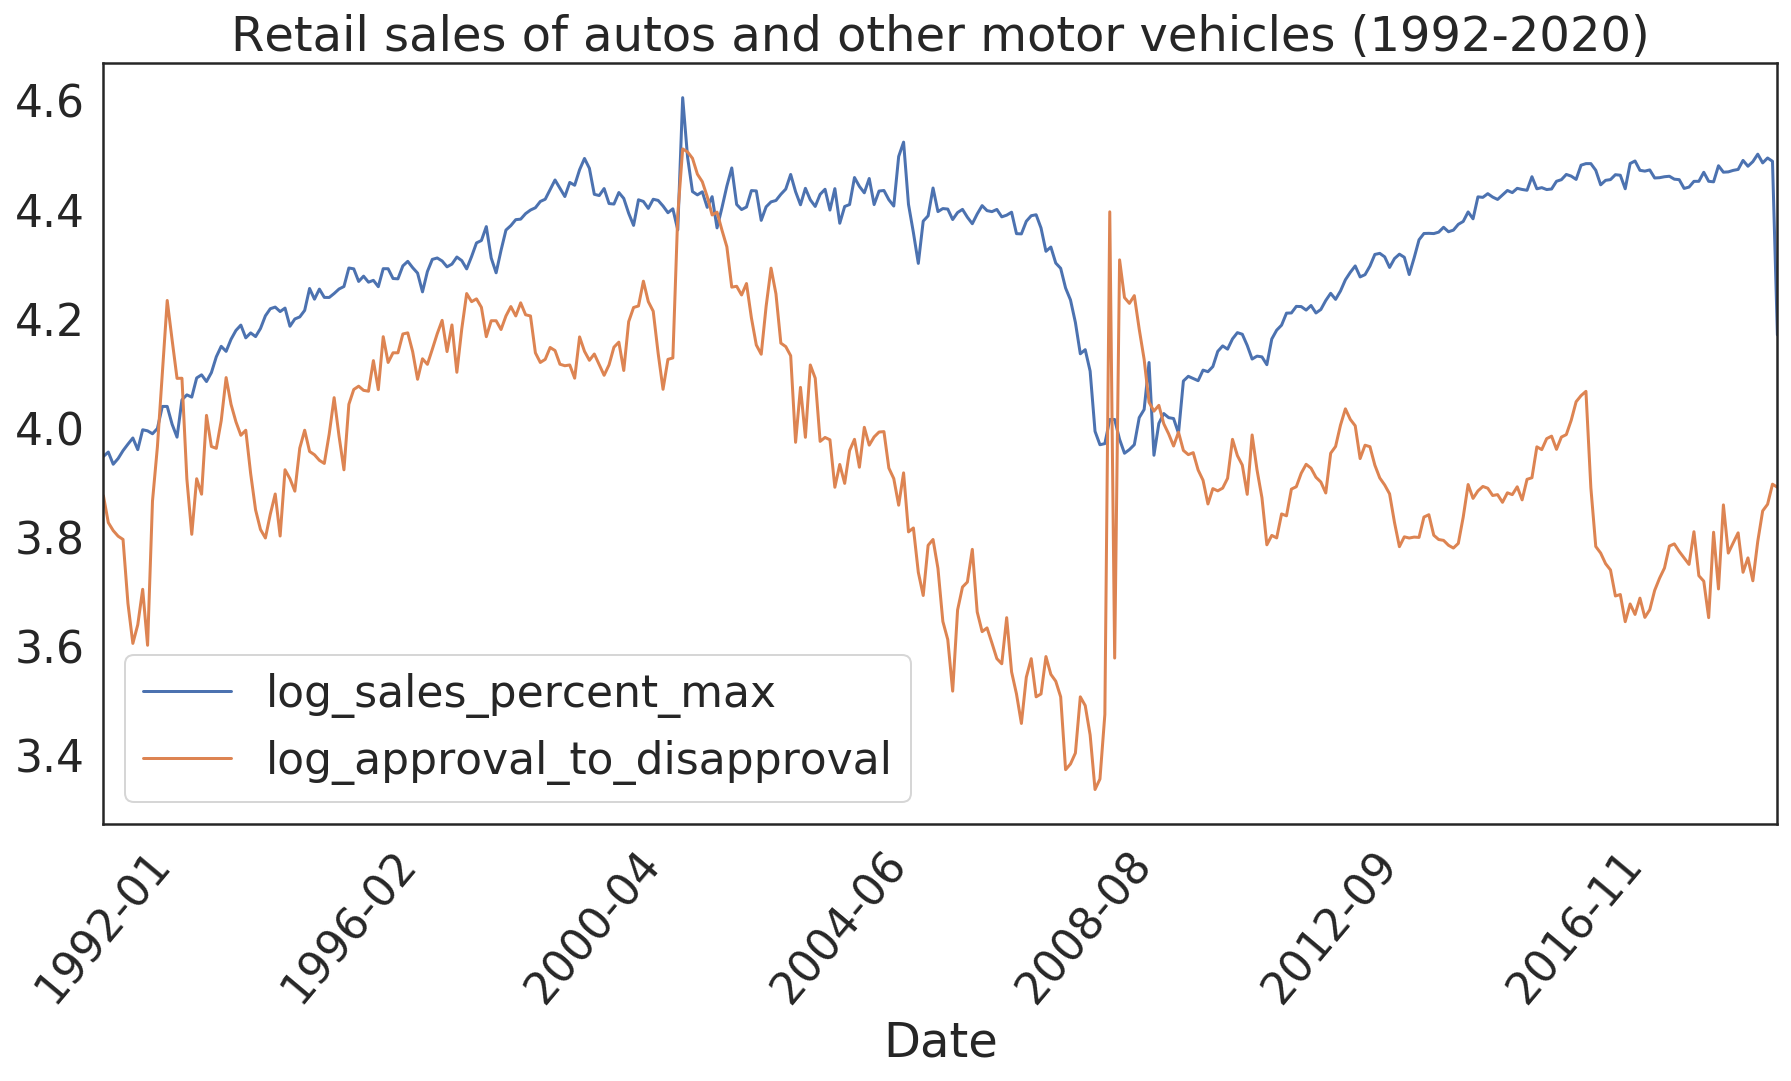

In [82]:
fig = vehicles_approval_df.plot.line(x='date_month_only',y=['log_sales_percent_max', 'log_approval_to_disapproval'],rot=50,figsize=(15,7))
fig.set_xlabel('Date')
fig.set_title('Retail sales of autos and other motor vehicles (1992-2020)')

Looking at the graph we see a general increase in both sales of vehicles and approval will the year 2000. We then see a huge fall in approval and not such a dramatic fall in sales but nevetheless both are decreasing till 2008. Around 2008 the trend reverses and there seems to be an increase in sales but a decrease in approval. We also see many peaks which might be correlated with president changes and other events e.g. after the 2008 crisis fall, we have a change of president (Bush to Obama) correlating with a huge peak. <br> Let's explore this further:

In [83]:
outcome, predictors = patsy.dmatrices('log_approval_to_disapproval ~ log_sales_percent_max', vehicles_approval_df)
mod = sm.OLS(outcome, predictors)
## fit the model
res = mod.fit()

## look at the results
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:     log_approval_to_disapproval   R-squared:                       0.007
Model:                                     OLS   Adj. R-squared:                  0.004
Method:                          Least Squares   F-statistic:                     2.340
Date:                         Fri, 05 Jun 2020   Prob (F-statistic):              0.127
Time:                                 09:45:32   Log-Likelihood:                 32.681
No. Observations:                          342   AIC:                            -61.36
Df Residuals:                              340   BIC:                            -53.69
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

We plot the created linear regression model but the line is nearly horizontal indicating that there is no correlation (coef around 0.1).

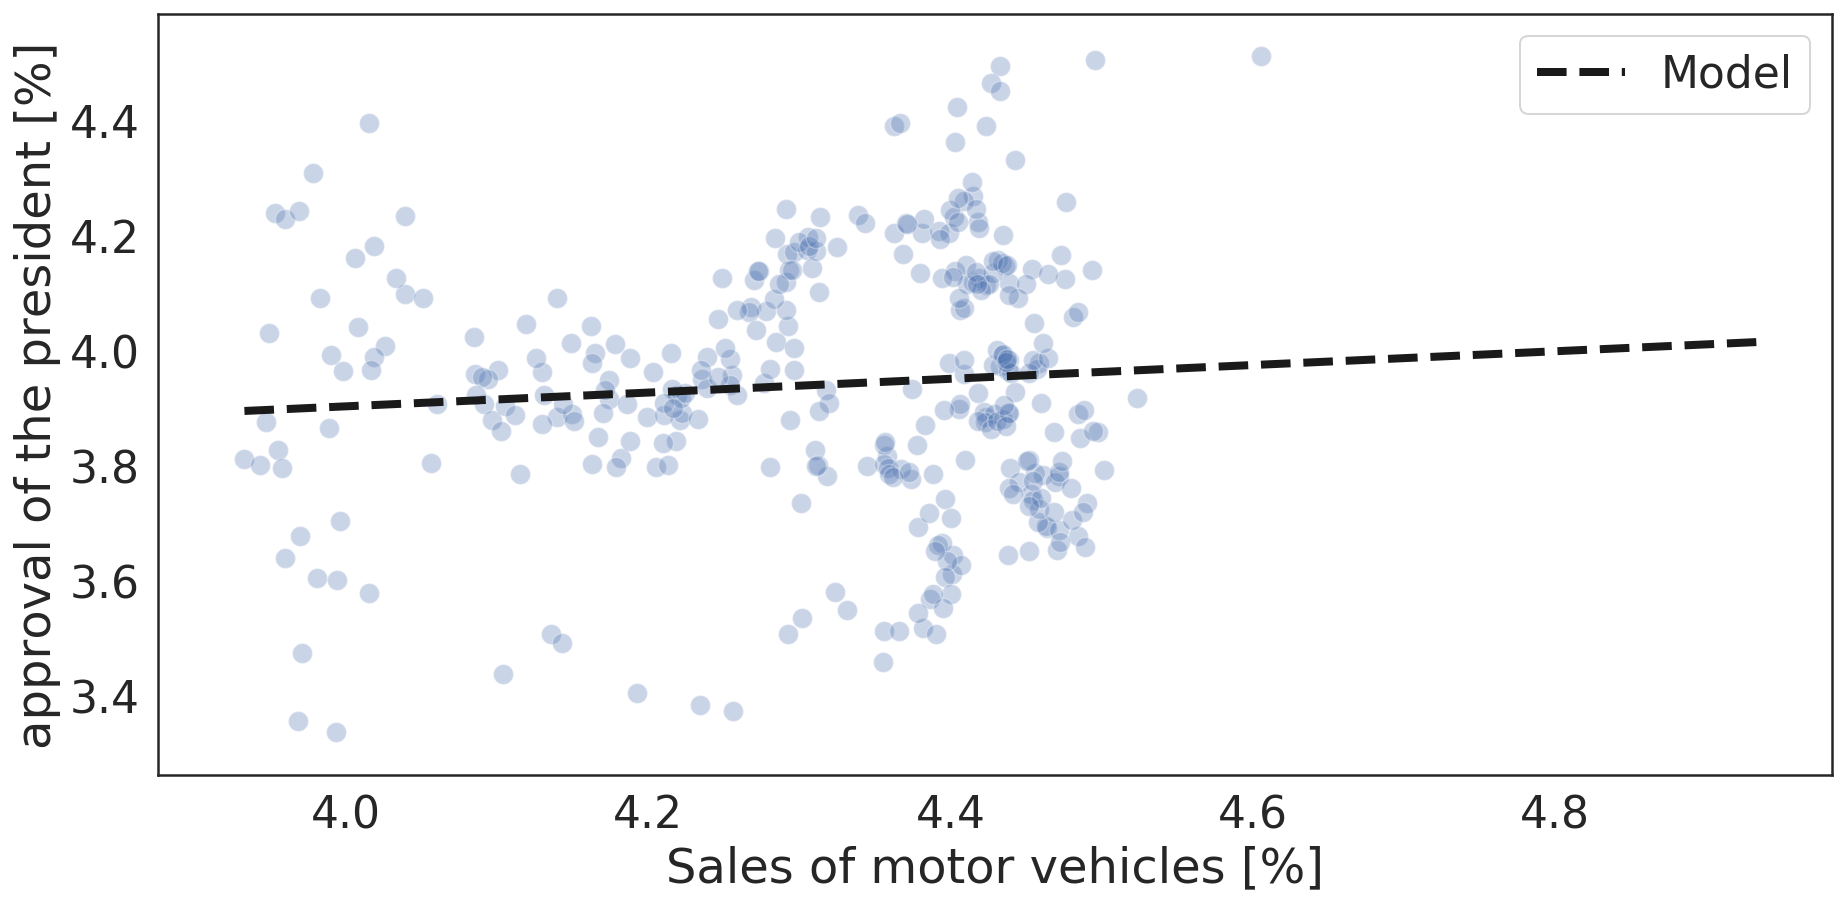

In [105]:
plt.figure(figsize=(15, 7))

# Plot the orginal data (as before)
sns.scatterplot(x='log_sales_percent_max', y='log_approval_to_disapproval', alpha=0.3, data=vehicles_approval_df, s=100)

# Generate and plot the model fit line
xs = np.arange(vehicles_approval_df['log_sales_percent_max'].min(), vehicles_approval_df['log_sales_percent_max'].max()+0.5)
ys = 0.1198 * xs + 3.4234
plt.plot(xs, ys, '--k', linewidth=4, label='Model')

plt.xlabel('Sales of motor vehicles [%]')
plt.ylabel('approval of the president [%]')
plt.legend();

However, as we saw before there was a change in pattern around 2008 so let's split the data and explore it separately.

In [91]:
veh_app_df_2008 = vehicles_approval_df[:200]
veh_app_df_2020 = vehicles_approval_df[200:]

In [86]:
outcome2, predictors2 = patsy.dmatrices('log_approval_to_disapproval ~ log_sales_percent_max', veh_app_df_2008)
mod2 = sm.OLS(outcome2, predictors2)
## fit the model
res2 = mod2.fit()

## look at the results
print(res2.summary())

                                 OLS Regression Results                                
Dep. Variable:     log_approval_to_disapproval   R-squared:                       0.078
Model:                                     OLS   Adj. R-squared:                  0.073
Method:                          Least Squares   F-statistic:                     16.64
Date:                         Fri, 05 Jun 2020   Prob (F-statistic):           6.56e-05
Time:                                 09:45:33   Log-Likelihood:                 7.2173
No. Observations:                          200   AIC:                            -10.43
Df Residuals:                              198   BIC:                            -3.838
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

We can know see a much stronger positive relationship between the two than before but it's still around 0.5 which is not a strong relationship overall.

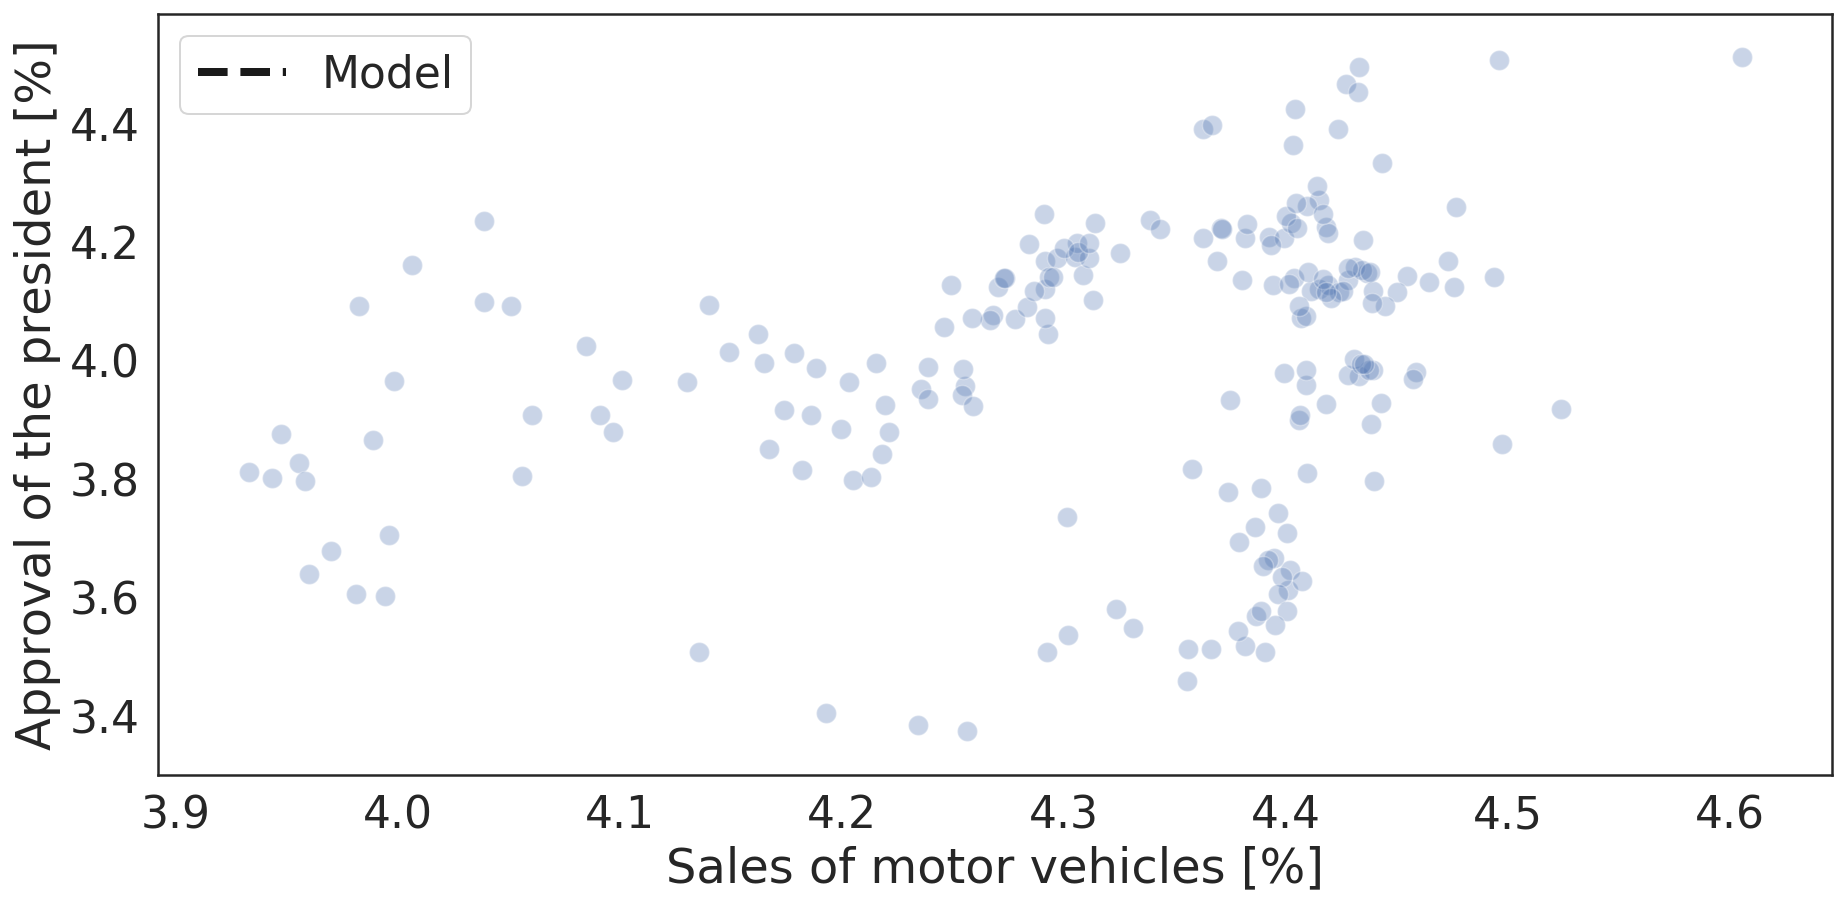

In [104]:
plt.figure(figsize=(15, 7))

# Plot the orginal data (as before)
sns.scatterplot(x='log_sales_percent_max', y='log_approval_to_disapproval', alpha=0.3, data=veh_app_df_2008, s=100)

# Generate and plot the model fit line
xs2 = np.arange(veh_app_df_2008['log_sales_percent_max'].min(), veh_app_df_2008['log_sales_percent_max'].max())
ys2 = 0.4836 * xs2 + 1.9058
plt.plot(xs2, ys2, '--k', linewidth=4, label='Model')

plt.xlabel('Sales of motor vehicles [%]')
plt.ylabel('Approval of the president [%]')
plt.legend();

In [88]:
outcome3, predictors3 = patsy.dmatrices('log_approval_to_disapproval ~ log_sales_percent_max', veh_app_df_2020)
mod3 = sm.OLS(outcome3, predictors3)
## fit the model
res3 = mod3.fit()

## look at the results
print(res3.summary())

                                 OLS Regression Results                                
Dep. Variable:     log_approval_to_disapproval   R-squared:                       0.084
Model:                                     OLS   Adj. R-squared:                  0.078
Method:                          Least Squares   F-statistic:                     12.91
Date:                         Fri, 05 Jun 2020   Prob (F-statistic):           0.000451
Time:                                 09:45:34   Log-Likelihood:                 67.854
No. Observations:                          142   AIC:                            -131.7
Df Residuals:                              140   BIC:                            -125.8
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

And, surprisingly, contrary to our hypothesis, we see a negative correlation from 2008 onwards between the two but it's on the order of around -0.3 so quite weak.

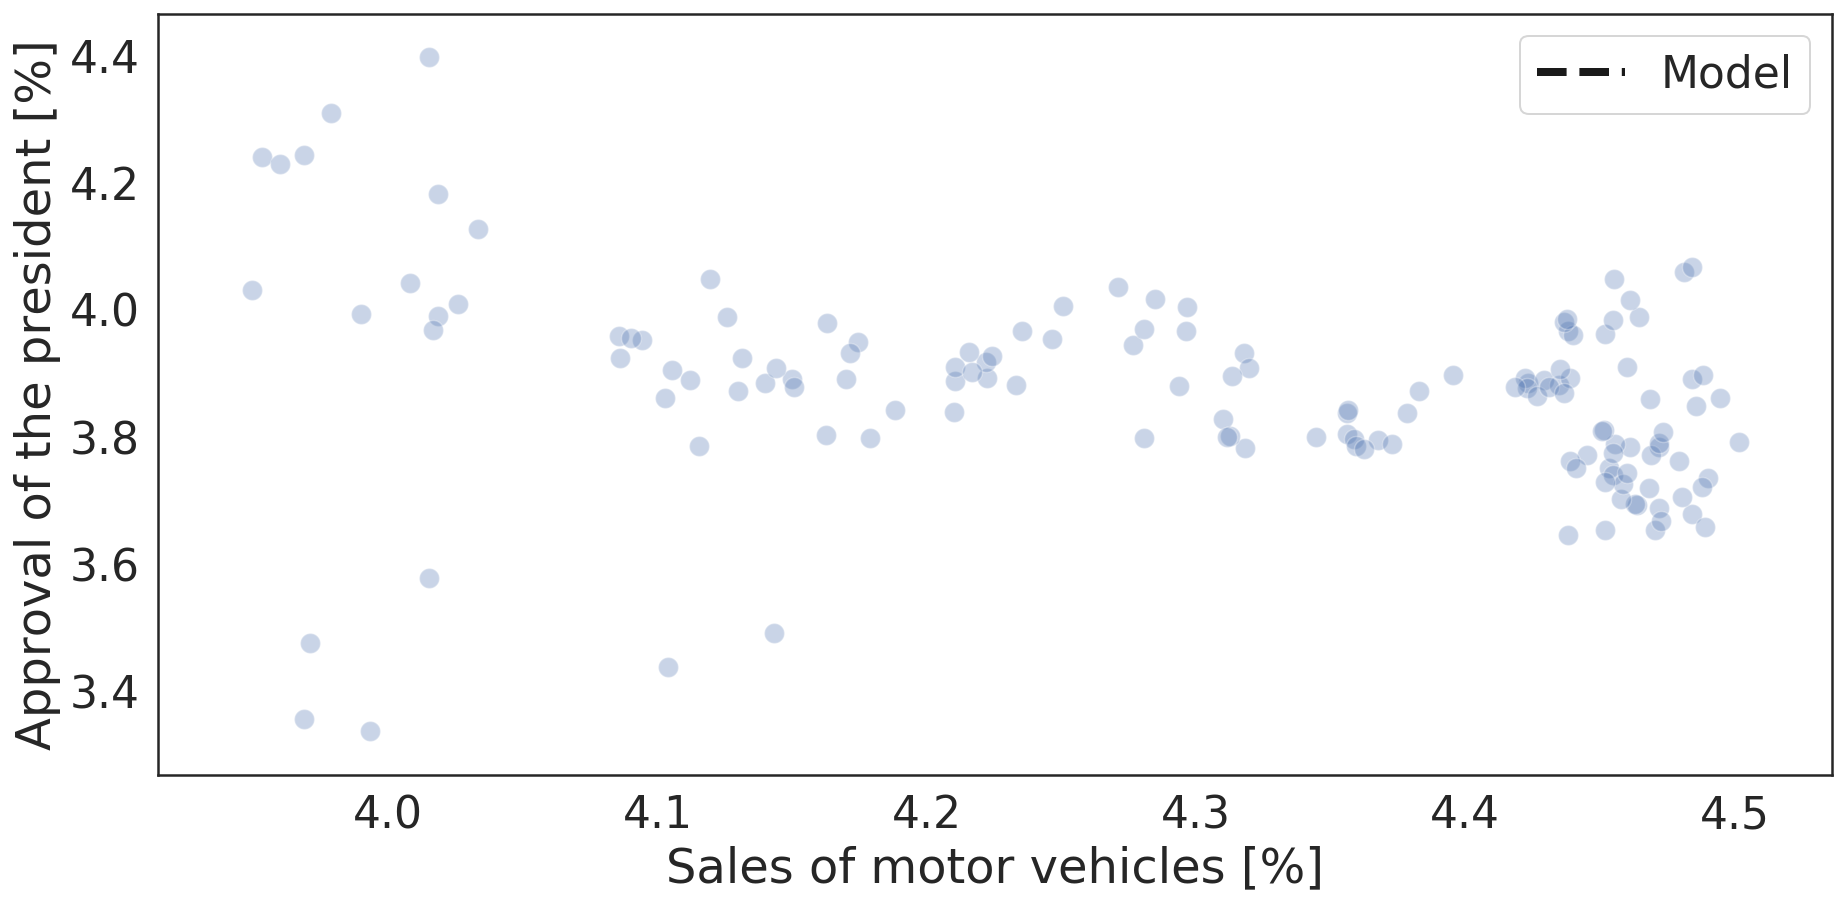

In [89]:
plt.figure(figsize=(15, 7))

# Plot the orginal data (as before)
sns.scatterplot(x='log_sales_percent_max', y='log_approval_to_disapproval', alpha=0.3, data=veh_app_df_2020, s=100)

# Generate and plot the model fit line
xs3 = np.arange(veh_app_df_2020['log_sales_percent_max'].min(), veh_app_df_2020['log_sales_percent_max'].max())
ys3 = -0.2713 * xs3 + 5.0316
plt.plot(xs3, ys3, '--k', linewidth=4, label='Model')

plt.xlabel('Sales of motor vehicles [%]')
plt.ylabel('Approval of the president [%]')
plt.legend();

### Retail Sales: Clothing stores

### Retail Sales: Restaurants and Other Eating Places

### Government social benefits: to persons

### Model with multiple predictors

## Ethics & Privacy

## Conclusion & Discussion

## Team Contributions